<a href="https://colab.research.google.com/github/robinr1998/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
columns_to_drop = ['EIN', 'NAME']
application_df.drop(columns=columns_to_drop, inplace=True)

In [3]:
# Determine the number of unique values in each column.
unique_value_counts = application_df.nunique()
unique_value_counts

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts > 1 to identify and replace with "Other"
classification_type_counts = application_df['CLASSIFICATION'].value_counts()
classification_type_counts2 = classification_type_counts[classification_type_counts > 1]
classification_type_counts2

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 100
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [8]:
# Look at AFFILIATION value counts to identify and replace with "Other"
affiliation_type_counts = application_df['AFFILIATION'].value_counts()
affiliation_type_counts

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [10]:
# Choose a cutoff value and create a list of affiliation types to be replaced
# use the variable name `affiliation_types_to_replace`
cutoff_value = 15000
affiliation_types_to_replace = application_df['AFFILIATION'].value_counts()[application_df['AFFILIATION'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in affiliation_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [11]:
# Look at USE_CASE value counts to identify and replace with "Other"
use_case_type_counts = application_df['USE_CASE'].value_counts()
use_case_type_counts

,count
USE_CASE,
Preservation,28095
ProductDev,5671
CommunityServ,384
Heathcare,146
Other,3


In [12]:
# Look at ORGANIZATION value counts to identify and replace with "Other"
organization_type_counts = application_df['ORGANIZATION'].value_counts()
organization_type_counts

,count
ORGANIZATION,
Trust,23515
Association,10255
Co-operative,486
Corporation,43


In [13]:
# Look at STATUS value counts to identify and replace with "Other"
status_type_counts = application_df['STATUS'].value_counts()
status_type_counts
# DROP STATUS

,count
STATUS,
1,34294
0,5


In [14]:
# Look at INCOME_AMT value counts to identify and replace with "Other"
income_amt_type_counts = application_df['INCOME_AMT'].value_counts()
income_amt_type_counts

,count
INCOME_AMT,
0,24388
25000-99999,3747
100000-499999,3374
1M-5M,955
1-9999,728
10000-24999,543
10M-50M,240
5M-10M,185
50M+,139


In [15]:
# Look at SPECIAL_CONSIDERATIONS value counts to identify and replace with "Other"
special_considerations_type_counts = application_df['SPECIAL_CONSIDERATIONS'].value_counts()
special_considerations_type_counts
# DROP SPECIAL_CONSIDERATIONS

,count
SPECIAL_CONSIDERATIONS,
N,34272
Y,27


In [16]:
# Look at ASK_AMT value counts to identify and replace with "Other"
ask_amt_considerations_type_counts = application_df['ASK_AMT'].value_counts()
ask_amt_considerations_type_counts

,count
ASK_AMT,
5000,25398
10478,3
15583,3
63981,3
6725,3
...,...
5371754,1
30060,1
43091152,1


In [17]:
# Choose a cutoff value and create a list of ask amounts to be replaced
# use the variable name `ask_amts_to_replace`
cutoff_value = 3
ask_amts_to_replace = application_df['ASK_AMT'].value_counts()[application_df['ASK_AMT'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in ask_amts_to_replace:
    application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['ASK_AMT'].value_counts()

,count
ASK_AMT,
5000,25398
Other,8889
15583,3
6725,3
10478,3
63981,3


In [18]:
# Drop additional columns:
columns_to_drop = ['ORGANIZATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_df.drop(columns=columns_to_drop, inplace=True)

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df, dtype=int)
dummies.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,ASK_AMT_5000,ASK_AMT_6725,ASK_AMT_10478,ASK_AMT_15583,ASK_AMT_63981,ASK_AMT_Other
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layer
nn_model.add(tf.keras.layers.Input(shape=(30,)))

# Add our first Dense layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Add our second Dense layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 80)                  │           2,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,941 (19.30 KB)

 Trainable params: 4,941 (19.30 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7038 - loss: 0.5920
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7248 - loss: 0.5659
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7221 - loss: 0.5638
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7262 - loss: 0.5598
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7274 - loss: 0.5587
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.5598
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7291 - loss: 0.5557
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7229 - loss: 0.5633
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7216 - loss: 0.5631
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7263 - loss: 0.5597
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7276 - loss: 0.5575
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

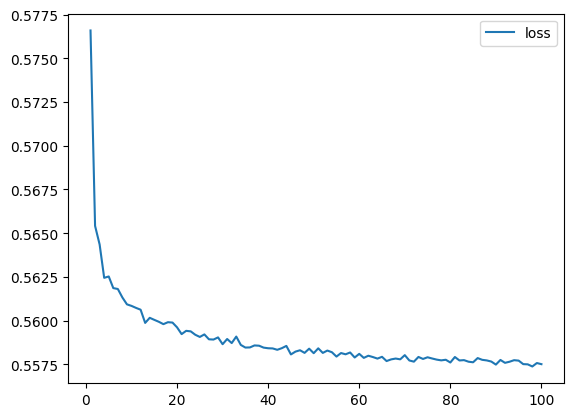

In [28]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

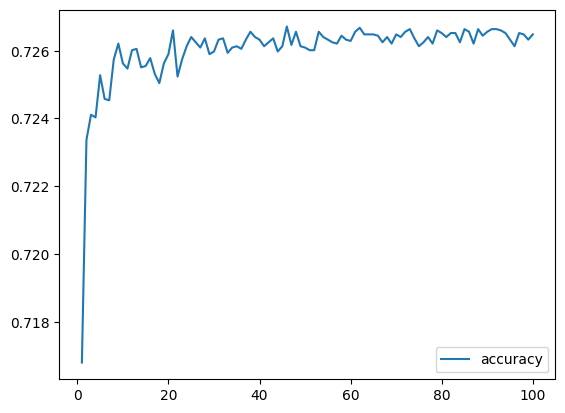

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7190 - loss: 0.5726
Loss: 0.5725576281547546, Accuracy: 0.7189504504203796


In [ ]:
# Export our model to HDF5 file
filepath = r"C:\Users\robin\OneDrive\Documents\Homework\Module_21\deep-learning-challenge\AlphabetSoupCharity_Optimization_2.keras"
nn_model.save(filepath)